Total Distance: 1468.39 m
Maximum Height: 367.10 m
Time: 17.31 sec


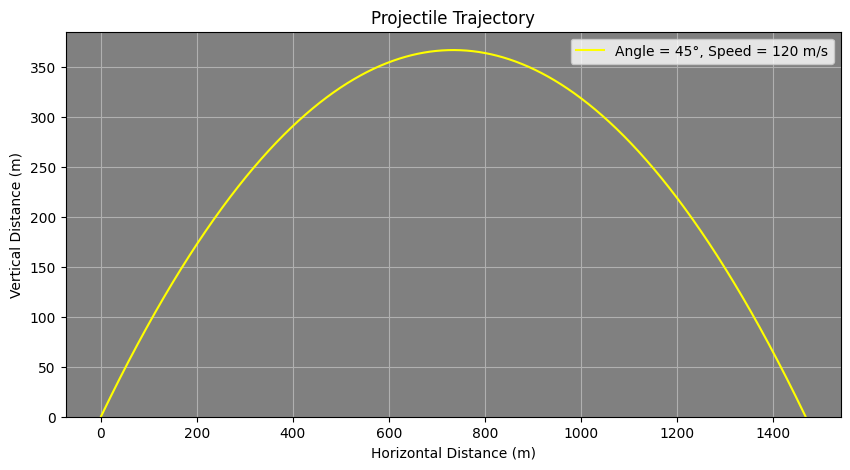

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, tan, cos, sin, lambdify

g_value = 9.80665

x, theta, u, g = symbols('x theta u g')
y = x * tan(theta) - (g * x**2) / (2 * u**2 * cos(theta)**2)
y_function = lambdify((x, theta, u, g), y, modules=['numpy'])

def plot_trajectory_dt(angle, speed, dt=0.01):
    angle_rad = np.radians(angle)
    total_time = 0

    x_range = (speed**2 * np.sin(2 * angle_rad)) / g_value
    max_height = (speed**2 * np.sin(angle_rad)**2) / (2 * g_value)

    x_values, y_values, x_current = [], [], 0
    
    while True:
        y_current = y_function(x_current, angle_rad, speed, g_value)
        if y_current < 0:
            break
        x_values.append(x_current)
        y_values.append(y_current)
        x_current += speed * cos(angle_rad) * dt
        total_time += dt

    print(f"Total Distance: {x_range:.2f} m")
    print(f"Maximum Height: {max_height:.2f} m")
    print(f"Time: {total_time:.2f} sec")

    plt.figure(figsize=(10, 5))
    plt.plot(x_values, y_values, color='yellow', label=f"Angle = {angle}°, Speed = {speed} m/s")  # Yellow line for trajectory

    plt.title('Projectile Trajectory')
    plt.xlabel('Horizontal Distance (m)')
    plt.ylabel('Vertical Distance (m)')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.gca().set_facecolor('gray')
    plt.show()

# angle and speed
plot_trajectory_dt(45, 120)

In [20]:
y_function

<function _lambdifygenerated(x, theta, u, g)>